# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [3]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [2]:
path <- "data/test.xlsx"

In [5]:
group <- "kn1" #ek2

In [6]:
test_data <- read_excel(path, sheet = group)
keys_data <- read_excel(path, sheet = "keys")

In [7]:
colnames(test_data) <- c("No", "Std", "Group", "V", paste0("Q", 1:20), "Check")
test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,C,C,C,C,C,B,...,C,C,B,C,B,B,A,A,B,NA
2,Андрощук Роман Вікторович,КН-1(5)-1,1,B,C,C,C,B,A,...,C,C,C,B,B,A,C,C,B,NA
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA


In [8]:
test_data <- test_data |>
    #mutate(Std = "****** ****") |>
    mutate_at(colnames(test_data)[5:24], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(contains("Q"), ~replace_na(.x, "X")))
#head(test_data)

test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,C,C,C,C,C,B,...,C,C,B,C,B,B,A,A,B,NA
2,Андрощук Роман Вікторович,КН-1(5)-1,1,B,C,C,C,B,A,...,C,C,C,B,B,A,C,C,B,NA
3,Басок Максим Олександрович,КН-1(5)-3,4,C,A,D,D,B,C,...,C,A,C,B,B,D,A,B,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,D,B,A,D,D,D,...,A,B,D,A,B,C,A,C,C,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,A,B,B,C,...,C,D,B,A,D,A,D,D,C,NA


## 3. Перевірка правильності обчислень

In [10]:
test_data_check <- test_data |> filter(!is.na(Check))
test_data_check

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,B,C,A,C,A,C,...,D,D,B,A,B,C,D,D,C,5.25
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,D,A,C,C,...,C,C,C,B,D,B,A,C,B,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,C,B,A,D,A,...,D,C,B,C,C,D,A,D,D,6.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,D,A,D,B,D,B,...,C,B,B,A,B,C,B,B,C,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,C,B,B,D,B,C,...,C,D,A,B,A,C,B,D,A,3.75
54,Стуга Едуард Леонідович,КН-1(5)-1,8,B,D,D,D,B,D,...,D,C,C,A,B,A,B,D,C,2.25


## 3.1. Перевірка для непарних варіантів

In [21]:
test_data_np <- test_data_check |> filter(V %% 2 == 1)
test_data_np

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,D,A,C,C,...,C,C,C,B,D,B,A,C,B,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,C,B,A,D,A,...,D,C,B,C,C,D,A,D,D,6.75
41,Остапчук Микола Валентинович,КН-1(5)-2,5,C,B,B,D,B,C,...,C,D,A,B,A,C,B,D,A,3.75


In [22]:
answers_matrix <-  test_data_np |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,D,A,C,C,B,C,A,A,C,C,C,C,B,D,B,A,C,B
C,C,B,A,D,A,A,B,B,B,D,D,C,B,C,C,D,A,D,D
C,B,B,D,B,C,A,D,D,B,D,C,D,A,B,A,C,B,D,A


In [23]:
correct_answers <- keys_data$V1
correct_answers

[1] "C" "C" "C" "D" "D" "C" "A" "C" "A" "A" "D" "D" "C" "B" "C" "B" "D" "A" "A"
[20] "A"

In [24]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- test_data_np$Std
final_matrix

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Котюк Богдан Юрійович,1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0
Нечипорук Марія Ярославівна,1,1,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,0,0
Остапчук Микола Валентинович,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
grade <- 15/20

final_grades <- test_data_np |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data_np |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix) <- colnames(answers_matrix)

final_grades |> select(1:4, 25:27)

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,6.75,11,8.25
41,Остапчук Микола Валентинович,КН-1(5)-2,5,3.75,6,4.50


## 4. Співставлення варіантів 1 і 2

In [30]:
test_data_v1 <- test_data |> filter(V %% 2 == 1)
nrow(test_data_v1)
test_data_v2 <- test_data |> filter(V %% 2 == 0)
nrow(test_data_v2)

[1] 29

[1] 33

In [31]:
colnames(test_data_v2) <- c("No", "Std", "Group", "V", paste0("Q", keys_data$V2N), "Check")
test_data_v2 <- test_data_v2 |> select(No, Std,  Group, V, paste0("Q", 1:20), Check)
head(test_data_v2)

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
3,Басок Максим Олександрович,КН-1(5)-3,4,A,C,A,B,B,C,...,A,D,D,C,D,C,A,A,C,NA
4,Башмаков Богдан Олегович,КН-1(5)-1,8,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
5,Бенедик Олександр Сергійович,КН-1(5)-5,2,B,D,A,A,B,D,...,B,A,D,B,C,D,C,C,A,NA
6,Боженко Анастасія Ігорівна,КН-1(5)-1,6,D,B,D,A,D,D,...,B,A,D,B,A,C,D,A,C,NA
7,Власенко Андрій Максимович,КН-1(5)-1,6,B,C,A,A,B,A,...,B,D,C,B,C,A,A,D,B,NA
12,Грицаюк Богдан Вікторович,КН-1(5)-1,8,A,C,C,A,C,C,...,B,D,B,B,A,B,B,C,B,NA


In [32]:
test_data <- test_data_v1 |>
    bind_rows(test_data_v2)

In [33]:
answers_matrix <-  test_data |> select(Q1:Q20) |> as.matrix()
answers_matrix 

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,C,C,C,B,B,C,A,A,C,C,C,B,C,B,B,A,A,B
B,C,C,C,B,A,B,A,A,A,B,C,C,C,B,B,A,C,C,B
C,C,B,C,C,A,D,B,A,C,A,C,B,C,D,D,B,B,A,B
X,C,B,A,C,X,B,C,A,A,D,C,C,B,C,B,X,X,X,A
C,C,D,D,C,C,B,C,A,A,D,C,C,A,B,X,X,X,X,X
C,B,A,B,D,A,A,C,D,A,C,B,C,A,D,D,A,D,A,A
C,B,C,A,C,C,A,C,D,A,D,C,D,C,B,B,B,D,A,D
A,D,D,C,C,B,C,D,A,B,C,C,B,A,B,A,C,D,A,B
C,B,D,A,C,B,B,D,B,C,A,D,C,A,C,A,C,D,A,B
C,B,B,C,C,B,D,A,A,B,C,C,C,B,B,A,C,D,A,B


In [36]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- test_data$Std
final_matrix

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Анпілогов Антон Юрійович,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,1,0
Андрощук Роман Вікторович,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0
Войтюк Назарій Васильович,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Воробей Юрій Вікторович,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,1
Герасимчук Наталія Миколаївна,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0
Гомон Христина Вікторівна,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1
Гулієв Артур Борисович,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0
Гулюк Станіслав Юрійович,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
Дячук Дарина Олегівна,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
Злотенко Андрій Вікторович,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [43]:
grade <- 15/20

final_grades <- test_data |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix) <- colnames(answers_matrix)

final_grades |> select(1:4, 25:27)

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Анпілогов Антон Юрійович,КН-1(5)-5,3,NA,12,9.00
2,Андрощук Роман Вікторович,КН-1(5)-1,1,NA,6,4.50
8,Войтюк Назарій Васильович,КН-1(5)-1,9,NA,4,3.00
9,Воробей Юрій Вікторович,КН-1(5)-1,7,NA,10,7.50
10,Герасимчук Наталія Миколаївна,КН-1(5)-1,7,NA,9,6.75
11,Гомон Христина Вікторівна,КН-1(5)-1,5,NA,8,6.00
13,Гулієв Артур Борисович,КН-1(5)-1,3,NA,9,6.75
14,Гулюк Станіслав Юрійович,КН-1(5)-1,9,NA,2,1.50
16,Дячук Дарина Олегівна,КН-1(5)-2,1,NA,5,3.75


In [51]:
tbl <- test_data |>
    select(Q1:Q20) |> 
    unlist() |> 
    table() |>  
    as.data.frame()
tbl <- tbl |> left_join(test_data |>
    select(Q1:Q20) |> 
    unlist() |> 
    table() |>  
    prop.table() |>
    as.data.frame(), by = "Var1")
tbl

Var1,Freq.x,Freq.y
<fct>,<int>,<dbl>
A,259,0.208870968
B,321,0.258870968
C,371,0.299193548
D,277,0.223387097
X,12,0.009677419


In [56]:
final_grades <- final_grades |> 
select(1:4,25:27) |> 
arrange(desc(Grade)) |> 
mutate(Final = ceiling(Grade/max(final_grades$Grade)*15))

In [57]:
mean(final_grades$Final)

[1] 5.677419

In [62]:
final_grades |>
    group_by(Group) |>
    summarize(Mean = mean(Grade))

Group,Mean
<chr>,<dbl>
КН-1(5)-1,3.807692
КН-1(5)-2,4.673077
КН-1(5)-3,4.446429
КН-1(5)-4,4.250000
КН-1(5)-5,4.125000


Var1,Freq
<fct>,<dbl>
A,0.208870968
B,0.258870968
C,0.299193548
D,0.223387097
X,0.009677419


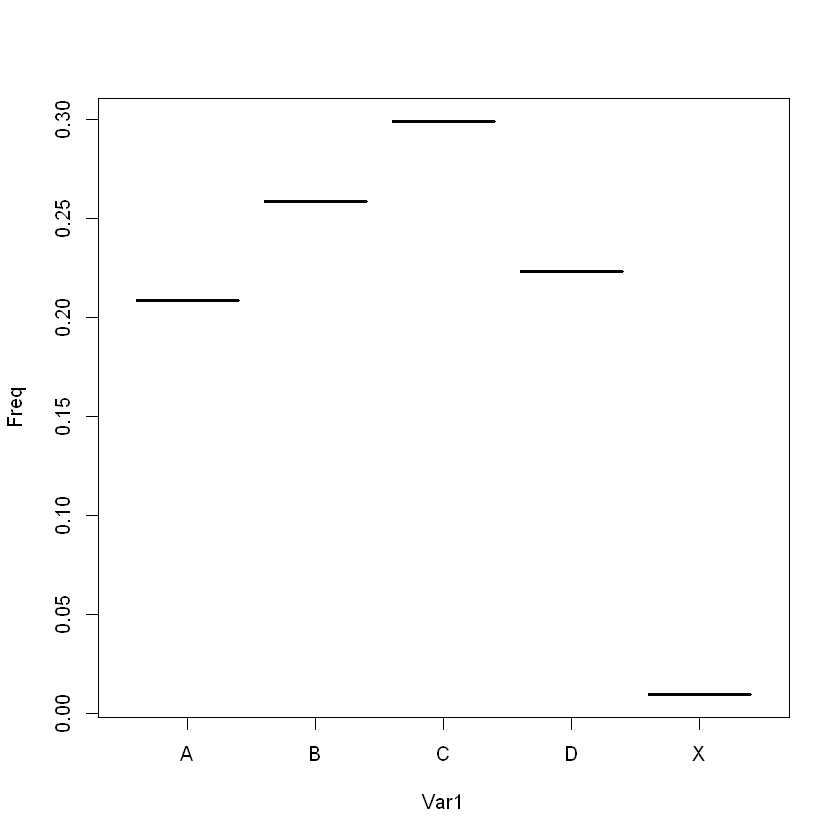

In [112]:
plot(x)

In [113]:
summary(test1_data)

ERROR: Error in summary(test1_data): object 'test1_data' not found


In [114]:
test_data

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
7,АНПІЛОГОВ АНТОН,1,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,1,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,1,C,C,D,D,C,C,B,...,D,C,C,A,B,X,X,X,X,X
10,АНУКОЩУК РОМАН,1,B,C,C,C,B,A,B,...,B,C,C,C,B,B,A,C,C,B
11,ЮРКІВ ДЕНИС,1,D,C,B,C,D,C,B,...,B,C,B,D,A,B,B,D,A,A
13,ТАБАЧУК ОЛЕКСАНДР,1,B,B,A,C,C,D,C,...,D,C,B,C,B,A,C,D,C,A
14,ДЯЧУК ДАРИНА,1,C,B,D,A,C,B,B,...,A,D,C,A,C,A,C,D,A,B
